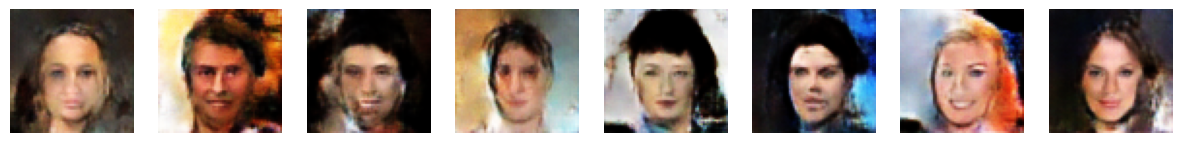

In [12]:
import onnxruntime as ort
import numpy as np
import matplotlib.pyplot as plt

ort_session = ort.InferenceSession("GAN_prod/generator.onnx")

batch_size = 8
noise = np.random.randn(batch_size, 100, 1, 1).astype(np.float32)

ort_inputs = {ort_session.get_inputs()[0].name: noise}
ort_outs = ort_session.run(None, ort_inputs)
generated_images = ort_outs[0]

def show_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    if len(images) == 1:
        axes = [axes]
    for img, ax in zip(images, axes):
        img = np.transpose(img, (1, 2, 0))
        img = (img - img.min()) / (img.max() - img.min())
        ax.imshow(img)
        ax.axis('off')
    plt.show()

show_images(generated_images)